# Problem Statement

Implement a KNN model to classify the animals in to categorie

# Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Importing dataset

In [2]:
zoo = pd.read_csv("Zoo.csv")

In [3]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
zoo.shape

(101, 18)

In [5]:
zoo.size

1818

In [6]:
# Descriptive Statistics
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [8]:
# Checking Null Values
zoo.isnull()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
zoo.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

There are no null values

In [10]:
#Checking Duplicate values
zoo.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
96     False
97     False
98     False
99     False
100    False
Length: 101, dtype: bool

In [11]:
zoo.duplicated().sum()

0

There are no duplicate values

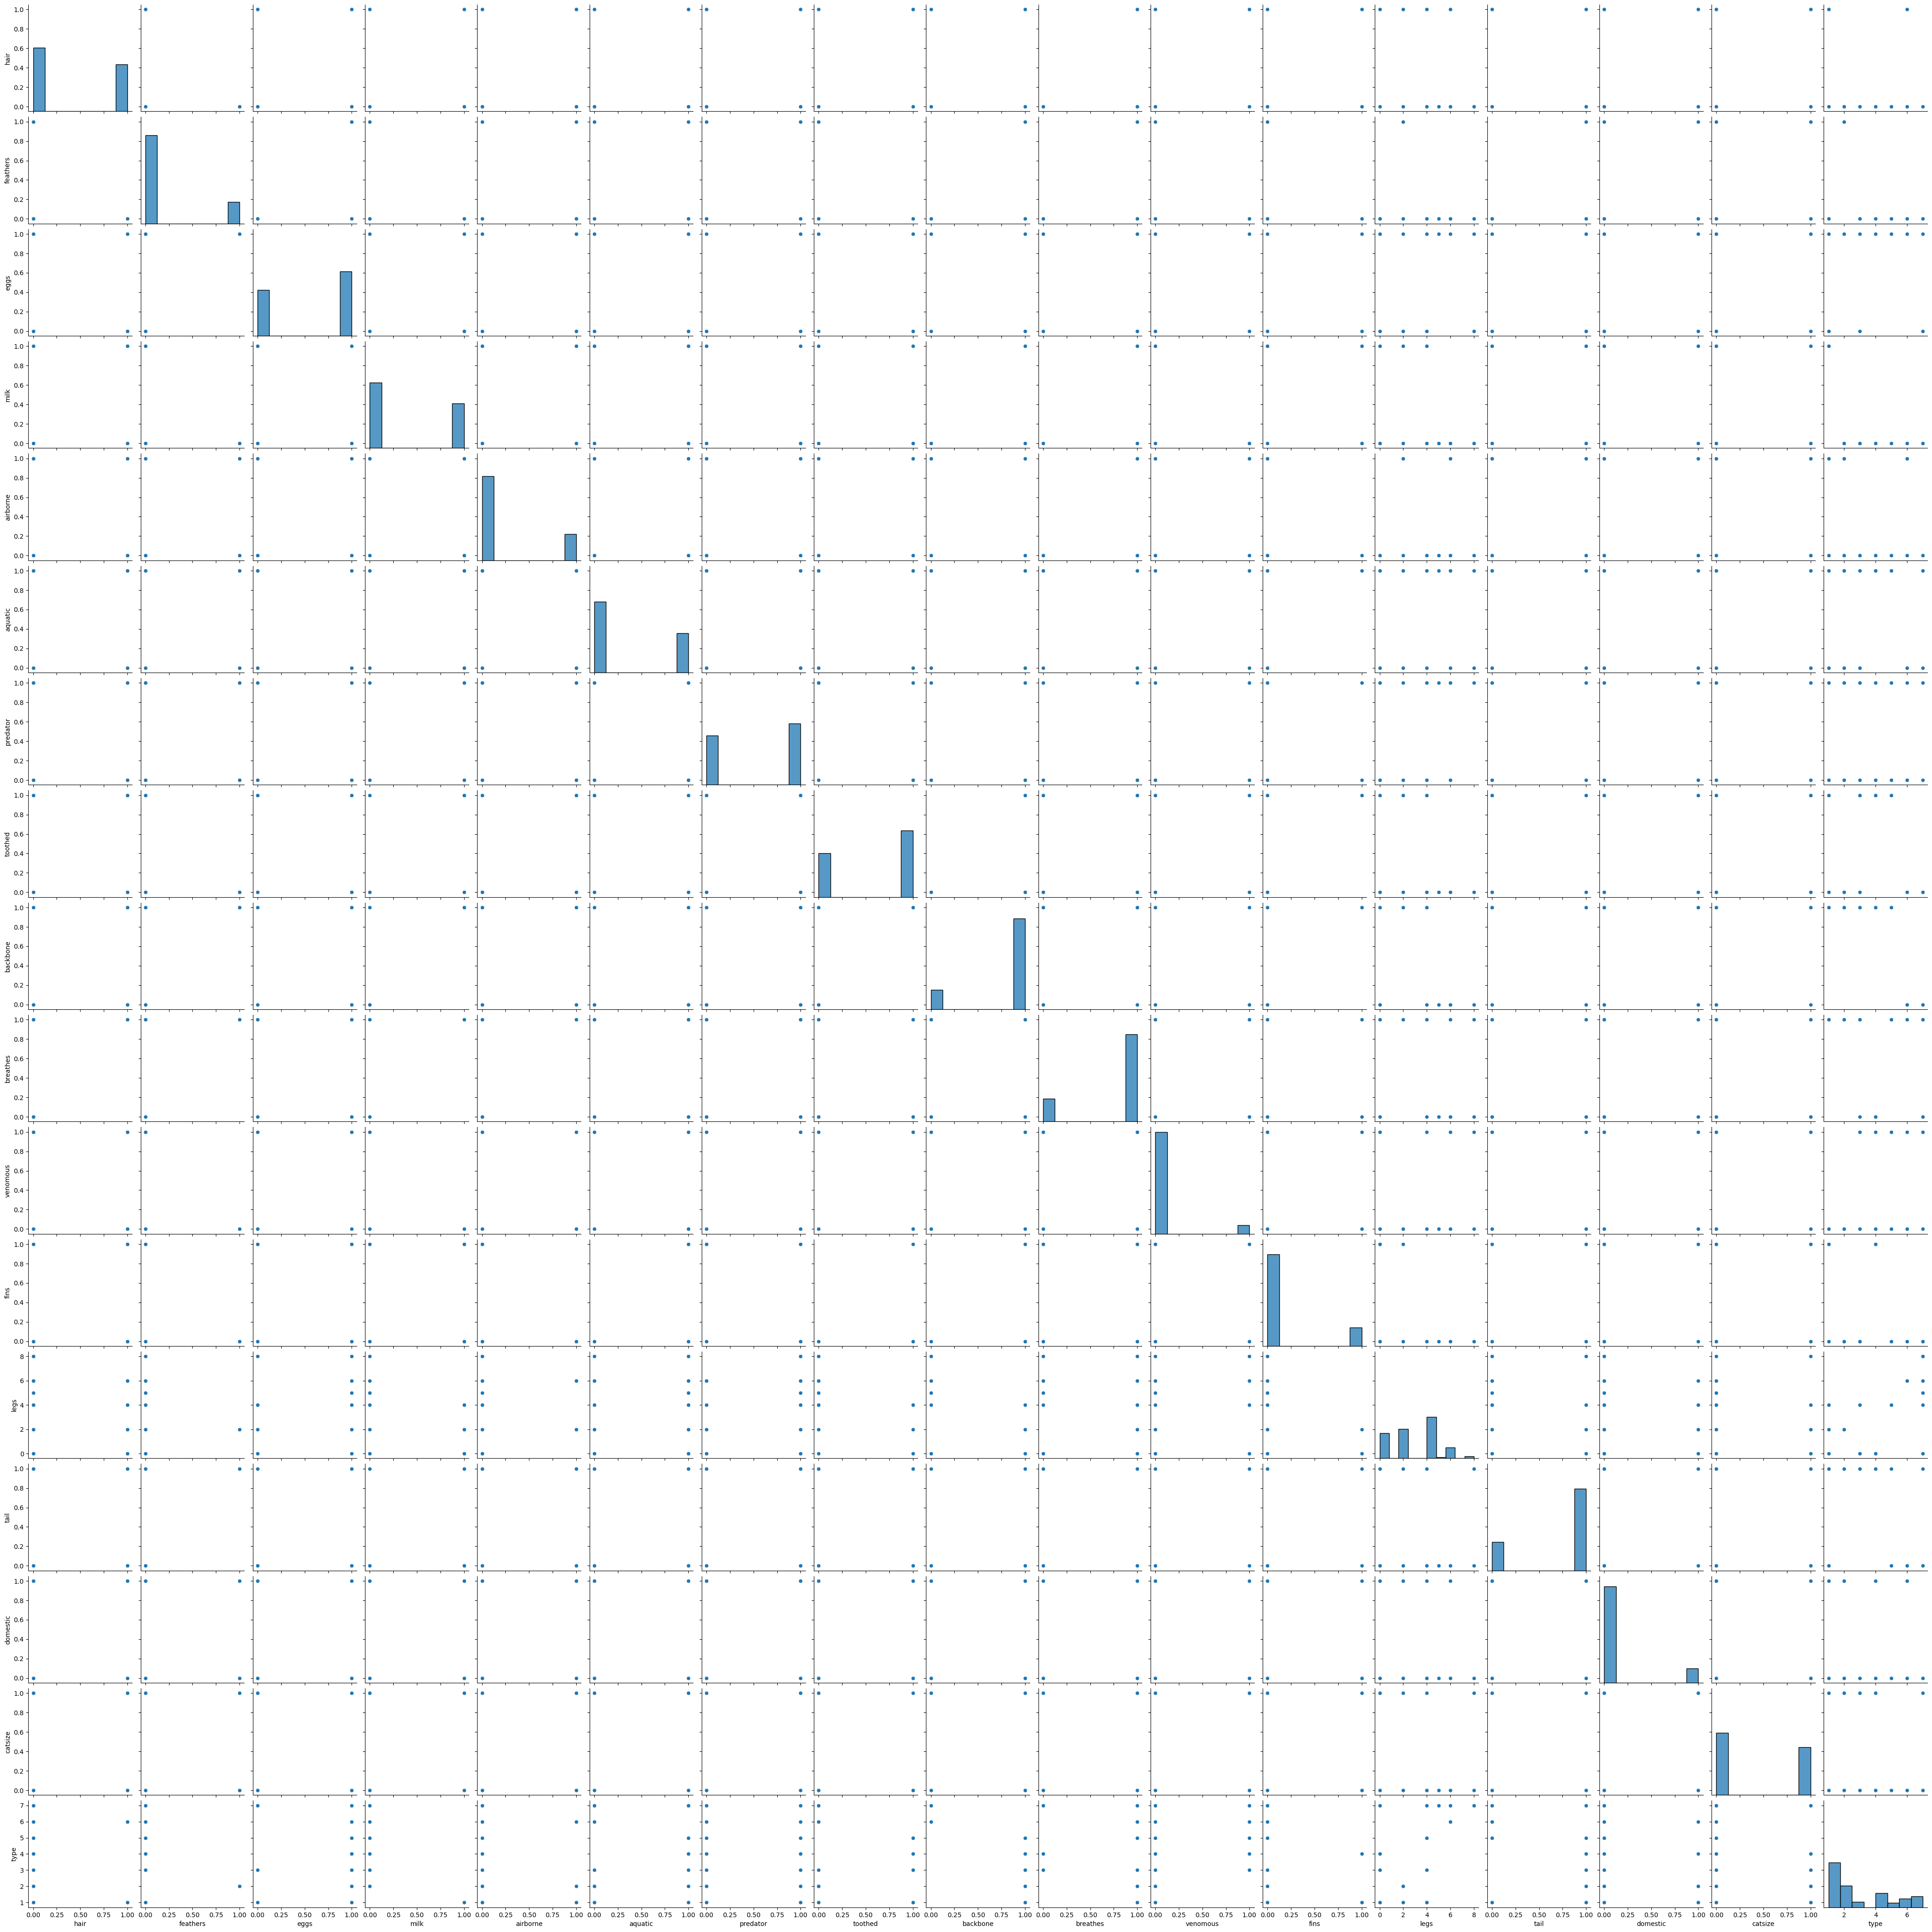

In [12]:
sns.pairplot(zoo)
plt.show()

In [13]:
# Lets see what are the values of each feature
for i in zoo.columns:
    print(i)
    print("Unique values for ", i, "is: ")
    print(zoo[i].unique())

animal name
Unique values for  animal name is: 
['aardvark' 'antelope' 'bass' 'bear' 'boar' 'buffalo' 'calf' 'carp'
 'catfish' 'cavy' 'cheetah' 'chicken' 'chub' 'clam' 'crab' 'crayfish'
 'crow' 'deer' 'dogfish' 'dolphin' 'dove' 'duck' 'elephant' 'flamingo'
 'flea' 'frog' 'fruitbat' 'giraffe' 'girl' 'gnat' 'goat' 'gorilla' 'gull'
 'haddock' 'hamster' 'hare' 'hawk' 'herring' 'honeybee' 'housefly' 'kiwi'
 'ladybird' 'lark' 'leopard' 'lion' 'lobster' 'lynx' 'mink' 'mole'
 'mongoose' 'moth' 'newt' 'octopus' 'opossum' 'oryx' 'ostrich' 'parakeet'
 'penguin' 'pheasant' 'pike' 'piranha' 'pitviper' 'platypus' 'polecat'
 'pony' 'porpoise' 'puma' 'pussycat' 'raccoon' 'reindeer' 'rhea'
 'scorpion' 'seahorse' 'seal' 'sealion' 'seasnake' 'seawasp' 'skimmer'
 'skua' 'slowworm' 'slug' 'sole' 'sparrow' 'squirrel' 'starfish'
 'stingray' 'swan' 'termite' 'toad' 'tortoise' 'tuatara' 'tuna' 'vampire'
 'vole' 'vulture' 'wallaby' 'wasp' 'wolf' 'worm' 'wren']
hair
Unique values for  hair is: 
[1 0]
feathers
Un

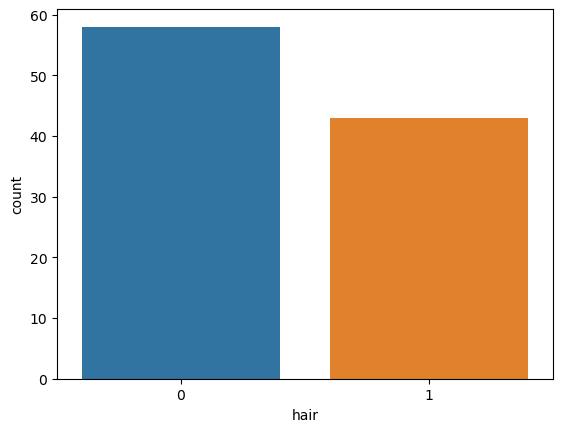

0    58
1    43
Name: hair, dtype: int64

In [14]:
sns.countplot(zoo['hair'])
plt.show()
zoo['hair'].value_counts()

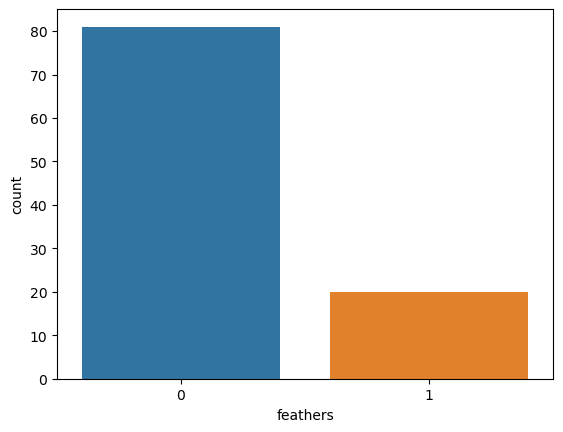

0    81
1    20
Name: feathers, dtype: int64

In [15]:
#lets see how many animals have feathers
sns.countplot(zoo['feathers'])
plt.show()
zoo['feathers'].value_counts()

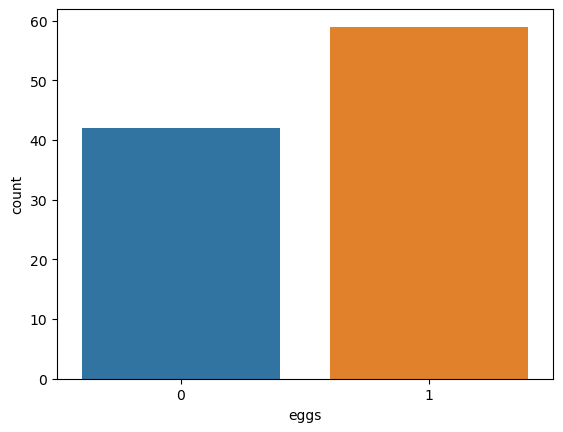

1    59
0    42
Name: eggs, dtype: int64

In [16]:
#lets see how mant animals give eggs
sns.countplot(zoo['eggs'])
plt.show()
zoo['eggs'].value_counts()

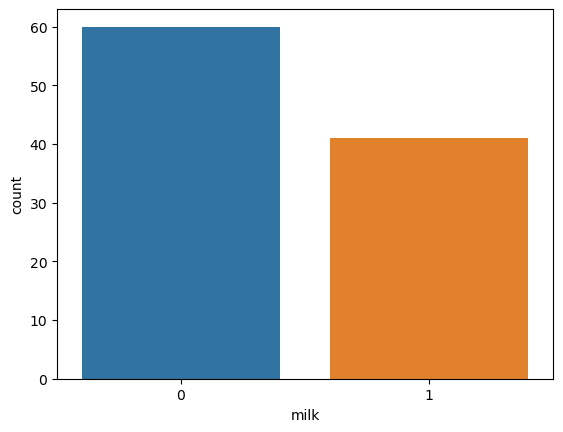

0    60
1    41
Name: milk, dtype: int64

In [17]:
#lets see how many animals provides us with milk
sns.countplot(zoo['milk'])
plt.show()
zoo['milk'].value_counts()

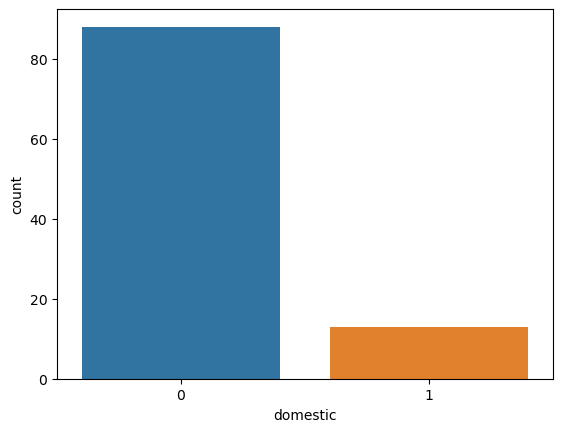

0    88
1    13
Name: domestic, dtype: int64

In [18]:
#lets see how many animals are domestic
sns.countplot(zoo['domestic'])
plt.show()
zoo['domestic'].value_counts()

13 animals are domestic other are wild animals

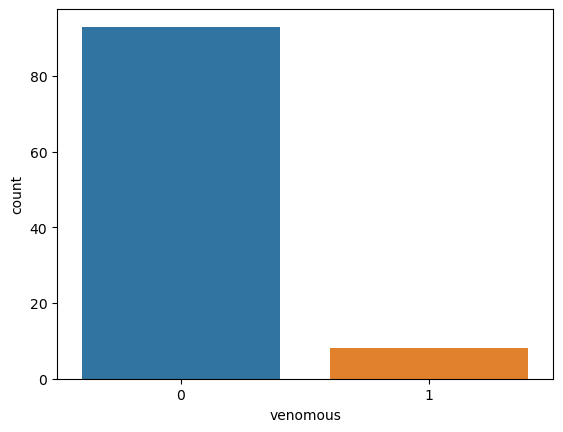

0    93
1     8
Name: venomous, dtype: int64

In [19]:
#lets see how many animals are venomous
sns.countplot(zoo['venomous'])
plt.show()
zoo['venomous'].value_counts()

Only 8 animals are venomous.

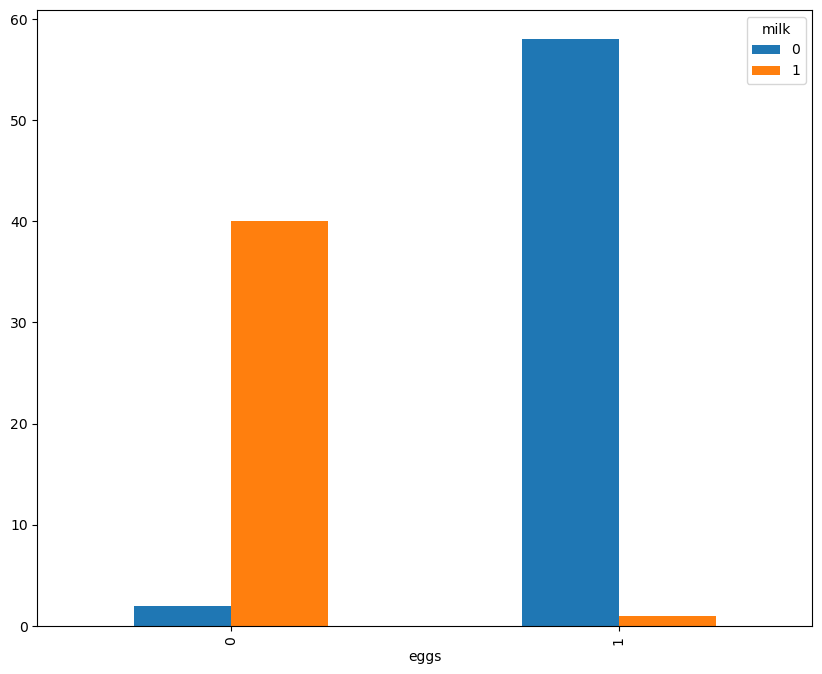

In [20]:
pd.crosstab(zoo['eggs'],zoo['milk']).plot(kind="bar", figsize=(10,8))
plt.show()

In [21]:
pd.crosstab(zoo['eggs'],zoo['milk'])

milk,0,1
eggs,,
0,2,40
1,58,1


There only 2 animals who neither give eggs nor milk, and only 1 which give both eggs and milk.

Mostly, animals who give eggs doesn't give milk, and animals who doesn't give eggs but give milk.

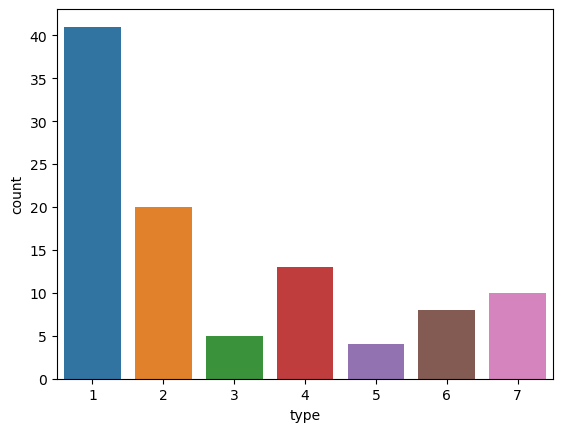

In [22]:
sns.countplot(zoo['type'])
plt.show()

# Splitting Data in Train and Test

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [25]:
X = zoo.iloc[:,1:-1]
Y = zoo.iloc[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state=1, stratify=Y) 

In [26]:
X_train

In [ ]:
Y_train

In [ ]:
X_test

In [ ]:
Y_test

# KNN Algorithm

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
kfolds = KFold(n_splits=10)

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)

In [ ]:
model.fit(X_train, Y_train)

In [ ]:
results = cross_val_score(model, X_train, Y_train, cv=kfolds)

In [ ]:
print(results.mean())

# Grid Search for Algorithm Tuning

In [ ]:
n_neighbors = np.array(range(1,81))
param_grid = dict(n_neighbors=n_neighbors)
param_grid

In [ ]:
KNN = KNeighborsClassifier()

In [ ]:
grid = GridSearchCV(estimator=KNN, param_grid=param_grid)
grid.fit(X_train, Y_train)

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

In [ ]:
k_range = range(1,81)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv = 5)
    k_scores.append(scores.mean())
    
plt.plot(k_range, k_scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross Validated Accuracy")
plt.show()

1 neighobur has highest accuracy

In [ ]:
pd.DataFrame(k_scores)

# Testing our model

In [ ]:
Knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
final_model = Knn.fit(X_train, Y_train)

In [ ]:
Y_pred = final_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(Y_test, Y_pred)